In [7]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import torchvision.models as models

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'functions')))
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics

In [8]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [ ]:
TRAIN_PATH = '../data/AP_PA_Train.xlsx'
TEST_PATH = '../data/AP_PA_Test.xlsx'
VAL_PATH = '../data/AP_PA_Validation.xlsx'

In [10]:
num_classes = 2
EPOCHS = 30

In [11]:
model = models.resnet101(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

for param in model.fc.parameters():
    param.requires_grad = True

/home/furkan/NIHChestXrays/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/furkan/NIHChestXrays/.venv/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/furkan/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


100%|██████████| 171M/171M [00:15<00:00, 11.6MB/s] 


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [13]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [15]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [ ]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=10)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True,num_workers=10)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True,num_workers=10)

In [ ]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,num_epochs=EPOCHS,patience=5)

Epoch 1/30 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.66it/s]


Epoch [1/30]
  Train Loss: 0.0917, Train Acc: 0.9711
  Val   Loss: 0.0518, Val   Acc: 0.9853
  Best model saved with val_loss: 0.0518


Epoch 2/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.70it/s]


Epoch [2/30]
  Train Loss: 0.0548, Train Acc: 0.9841
  Val   Loss: 0.0443, Val   Acc: 0.9881
  Best model saved with val_loss: 0.0443


Epoch 3/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.75it/s]


Epoch [3/30]
  Train Loss: 0.0503, Train Acc: 0.9859
  Val   Loss: 0.0407, Val   Acc: 0.9893
  Best model saved with val_loss: 0.0407


Epoch 4/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.78it/s]


Epoch [4/30]
  Train Loss: 0.0467, Train Acc: 0.9867
  Val   Loss: 0.0395, Val   Acc: 0.9898
  Best model saved with val_loss: 0.0395


Epoch 5/30 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.67it/s]


Epoch [5/30]
  Train Loss: 0.0439, Train Acc: 0.9878
  Val   Loss: 0.0431, Val   Acc: 0.9882
  No improvement. Early stopping counter: 1/5


Epoch 6/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.73it/s]


Epoch [6/30]
  Train Loss: 0.0425, Train Acc: 0.9886
  Val   Loss: 0.0361, Val   Acc: 0.9904
  Best model saved with val_loss: 0.0361


Epoch 7/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.79it/s]


Epoch [7/30]
  Train Loss: 0.0418, Train Acc: 0.9889
  Val   Loss: 0.0371, Val   Acc: 0.9904
  No improvement. Early stopping counter: 1/5


Epoch 8/30 - Validation: 100%|██████████| 258/258 [01:20<00:00,  3.22it/s]


Epoch [8/30]
  Train Loss: 0.0407, Train Acc: 0.9891
  Val   Loss: 0.0356, Val   Acc: 0.9908
  Best model saved with val_loss: 0.0356


Epoch 9/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.70it/s]


Epoch [9/30]
  Train Loss: 0.0382, Train Acc: 0.9899
  Val   Loss: 0.0444, Val   Acc: 0.9881
  No improvement. Early stopping counter: 1/5


Epoch 10/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.78it/s]


Epoch [10/30]
  Train Loss: 0.0384, Train Acc: 0.9900
  Val   Loss: 0.0350, Val   Acc: 0.9906
  Best model saved with val_loss: 0.0350


Epoch 11/30 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.66it/s]


Epoch [11/30]
  Train Loss: 0.0374, Train Acc: 0.9908
  Val   Loss: 0.0360, Val   Acc: 0.9900
  No improvement. Early stopping counter: 1/5


Epoch 12/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.77it/s]


Epoch [12/30]
  Train Loss: 0.0358, Train Acc: 0.9903
  Val   Loss: 0.0348, Val   Acc: 0.9908
  Best model saved with val_loss: 0.0348


Epoch 13/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.71it/s]


Epoch [13/30]
  Train Loss: 0.0360, Train Acc: 0.9906
  Val   Loss: 0.0359, Val   Acc: 0.9905
  No improvement. Early stopping counter: 1/5


Epoch 14/30 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.66it/s]


Epoch [14/30]
  Train Loss: 0.0364, Train Acc: 0.9904
  Val   Loss: 0.0339, Val   Acc: 0.9911
  Best model saved with val_loss: 0.0339


Epoch 15/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.76it/s]


Epoch [15/30]
  Train Loss: 0.0372, Train Acc: 0.9899
  Val   Loss: 0.0325, Val   Acc: 0.9920
  Best model saved with val_loss: 0.0325


Epoch 16/30 - Validation: 100%|██████████| 258/258 [01:14<00:00,  3.47it/s]


Epoch [16/30]
  Train Loss: 0.0342, Train Acc: 0.9910
  Val   Loss: 0.0334, Val   Acc: 0.9913
  No improvement. Early stopping counter: 1/5


Epoch 17/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.74it/s]


Epoch [17/30]
  Train Loss: 0.0345, Train Acc: 0.9907
  Val   Loss: 0.0423, Val   Acc: 0.9891
  No improvement. Early stopping counter: 2/5


Epoch 18/30 - Validation: 100%|██████████| 258/258 [01:15<00:00,  3.40it/s]


Epoch [18/30]
  Train Loss: 0.0337, Train Acc: 0.9912
  Val   Loss: 0.0375, Val   Acc: 0.9902
  No improvement. Early stopping counter: 3/5


Epoch 19/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.69it/s]


Epoch [19/30]
  Train Loss: 0.0350, Train Acc: 0.9908
  Val   Loss: 0.0330, Val   Acc: 0.9909
  No improvement. Early stopping counter: 4/5


Epoch 20/30 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.67it/s]


Epoch [20/30]
  Train Loss: 0.0341, Train Acc: 0.9912
  Val   Loss: 0.0322, Val   Acc: 0.9924
  Best model saved with val_loss: 0.0322


Epoch 21/30 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.68it/s]


Epoch [21/30]
  Train Loss: 0.0334, Train Acc: 0.9915
  Val   Loss: 0.0335, Val   Acc: 0.9913
  No improvement. Early stopping counter: 1/5


Epoch 22/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.70it/s]


Epoch [22/30]
  Train Loss: 0.0343, Train Acc: 0.9913
  Val   Loss: 0.0304, Val   Acc: 0.9922
  Best model saved with val_loss: 0.0304


Epoch 23/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.72it/s]


Epoch [23/30]
  Train Loss: 0.0341, Train Acc: 0.9911
  Val   Loss: 0.0394, Val   Acc: 0.9899
  No improvement. Early stopping counter: 1/5


Epoch 24/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.74it/s]


Epoch [24/30]
  Train Loss: 0.0320, Train Acc: 0.9920
  Val   Loss: 0.0388, Val   Acc: 0.9901
  No improvement. Early stopping counter: 2/5


Epoch 25/30 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.72it/s]


Epoch [25/30]
  Train Loss: 0.0319, Train Acc: 0.9918
  Val   Loss: 0.0353, Val   Acc: 0.9916
  No improvement. Early stopping counter: 3/5


Epoch 26/30 - Validation: 100%|██████████| 258/258 [01:08<00:00,  3.78it/s]


Epoch [26/30]
  Train Loss: 0.0316, Train Acc: 0.9919
  Val   Loss: 0.0311, Val   Acc: 0.9923
  No improvement. Early stopping counter: 4/5


Epoch 27/30 - Validation: 100%|██████████| 258/258 [01:07<00:00,  3.82it/s]

Epoch [27/30]
  Train Loss: 0.0321, Train Acc: 0.9915
  Val   Loss: 0.0370, Val   Acc: 0.9904
  No improvement. Early stopping counter: 5/5
  Early stopping triggered. Training stopped.


In [12]:
print(f"num_epochs: {EPOCHS}")
print(f"train_losses: {len(train_losses)}")
print(f"val_losses: {len(val_losses)}")
print(f"train_accuracies: {len(train_accuracies)}")
print(f"val_accuracies: {len(val_accuracies)}")


num_epochs: 30
train_losses: 27
val_losses: 27
train_accuracies: 27
val_accuracies: 27


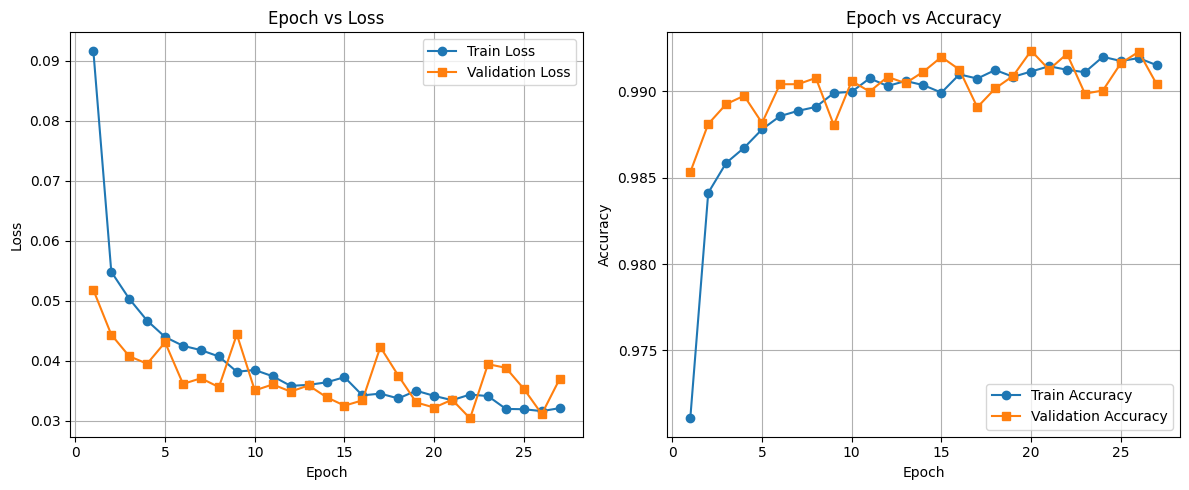

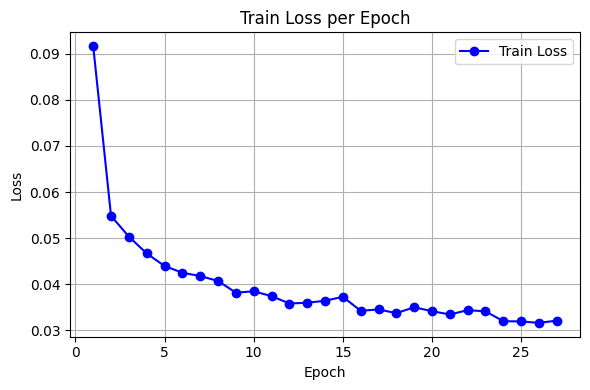

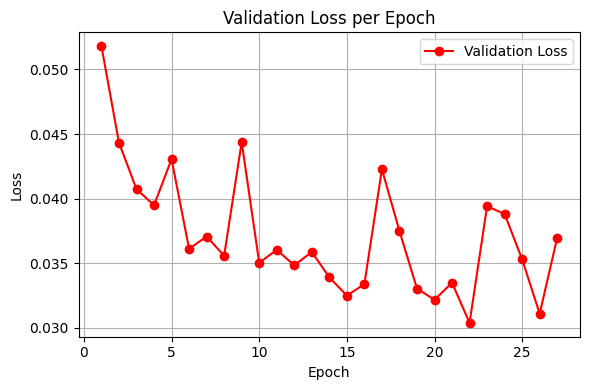

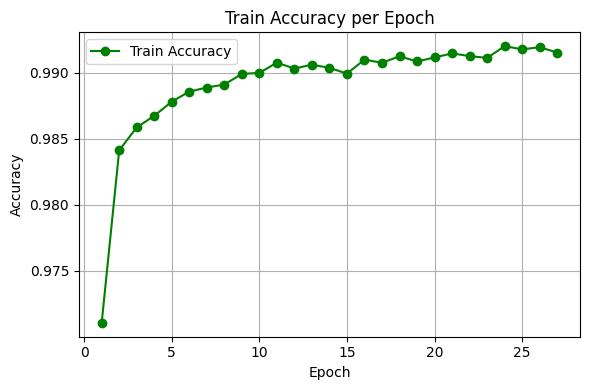

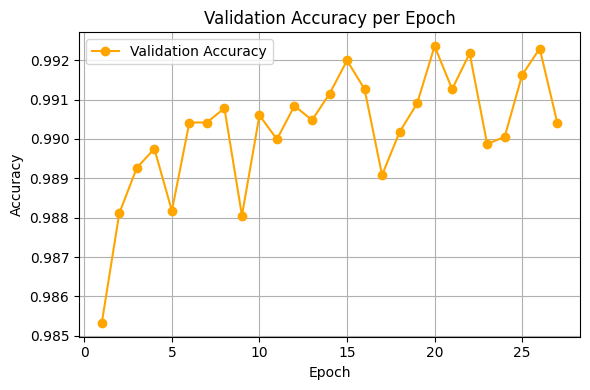

In [13]:
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 267/267 [01:14<00:00,  3.60it/s]

Precision: 0.9880
Recall:    0.9978
F1 Score:  0.9929
AUC:       0.9984


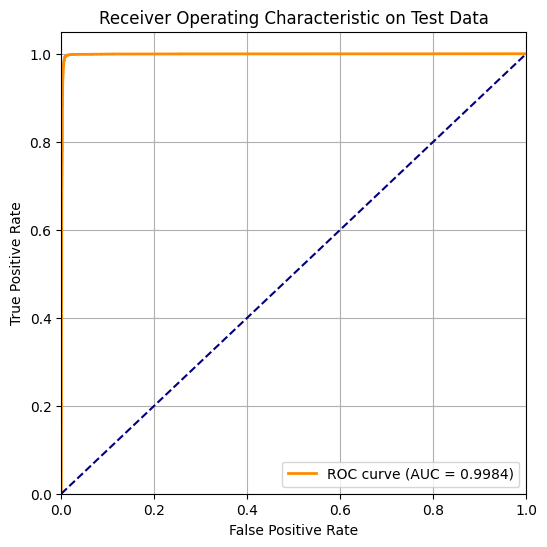

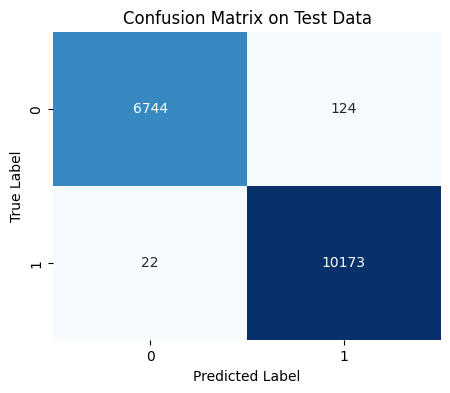

In [14]:
eval_on_metrics(model, test_dataloader)